# 줄어들지 않아
- https://www.acmicpc.net/problem/2688

각 자리수보다 왼쪽 자리수가 작거나 같을 때

In [93]:
t = int(input())
for _ in range(t):
    n = int(input())
    # dp 테이블 초기화(최소 1개)
    dp = [1 for i in range(10)]
    # 끝자리 고정해놓고 올 수 있는 경우의 수 계산
    for i in range(n-1):
        for j in range(10):
            dp[j] = sum(dp[j:])
    print(sum(dp))

3
2
55
3
220
4
715


# 내려가기
- https://www.acmicpc.net/problem/2096

1. 세 개의 숫자 중에서 하나를 고른다
2. 다음 줄로 내려간다
    - 바로 아래의 수
    - 바로 아래의 수와 붙어 있는 수
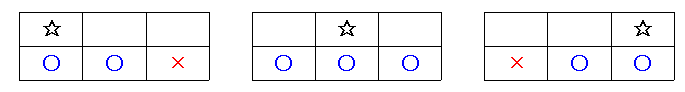

In [276]:
n = int(input())
start = list(map(int, input().split()))

max_dp = start
min_dp = start

# 입력 받는 즉시 계산 후 갱신
for i in range(n-1):
    a,b,c = map(int, input().split())
    max_dp = [a + max(max_dp[0], max_dp[1]), b + max(max_dp), c + max(max_dp[1], max_dp[2])]
    min_dp = [a + min(min_dp[0], min_dp[1]), b + min(min_dp), c + min(min_dp[1], min_dp[2])]

print(max(max_dp), min(min_dp))

3
1 2 3
4 5 6
4 9 0
18 6


# 게임 개발
- https://www.acmicpc.net/problem/1516

In [213]:
from collections import deque

# 노드(건물)의 개수 입력받기
v = int(input())

# 모든 노드에 대한 집입차수는 0으로 초기화
indegree = [0] * (v+1)

# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for _ in range(v+1)]


# 각 건물을 짓는데 걸리는 시간
time = [0] * (v+1)

# 방향 그래프의 모든 간선 정보를 입력받기
for i in range(1, v+1):
    info = list(map(int, input().split()))[:-1]
    time[i] = info[0]
    for j in info[1:]:
        graph[j].append(i) # 정점 j에서 i로 이동 가능
        # 진입차수를 1증가
        indegree[i] += 1

# 위상 정렬 함수
def topology_sort():
    result = [0] * (v+1) # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용
    
    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i] == 0:
            q.append(i)
            
    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result[now] += time[now]
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i]-= 1
            # 먼저 지어야 할 건물 걸리는 시간으로 갱신
            result[i] = max(result[i], result[now])
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    return result

result = topology_sort()

for i in range(1, v+1):
    print(result[i])

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
10
20
14
18
17
